# Reinforcement Learning

This IPy notebook acts as supporting material for **Chapter 21 Reinforcement Learning** of the book* Artificial Intelligence: A Modern Approach*. This notebook makes use of the implementations in rl.py module. We also make use of implementation of MDPs in the mdp.py module to test our agents. It might be helpful if you have already gone through the IPy notebook dealing with Markov decision process. Let us import everything from the rl module. It might be helpful to view the source of some of our implementations. Please refer to the Introductory IPy file for more details.

In [1]:
from rl import *

## Review
Before we start playing with the actual implementations let us review a couple of things about RL.

1. Reinforcement Learning is concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. 

2. Reinforcement learning differs from standard supervised learning in that correct input/output pairs are never presented, nor sub-optimal actions explicitly corrected. Further, there is a focus on on-line performance, which involves finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

-- Source: [Wikipedia](https://en.wikipedia.org/wiki/Reinforcement_learning)

In summary we have a sequence of state action transitions with rewards associated with some states. Our goal is to find the optimal policy (pi) which tells us what action to take in each state.

## Passive Reinforcement Learning

In passive Reinforcement Learning the agent follows a fixed policy and tries to learn the Reward function and the Transition model (if it is not aware of that).



### Passive Temporal Difference Agent

The PassiveTDAgent class in the rl module implements the Agent Program (notice the usage of word Program) described in **Fig 21.4** of the AIMA Book. PassiveTDAgent uses temporal differences to learn utility estimates. In simple terms we learn the difference between the states and backup the values to previous states while following a fixed policy.  Let us look into the source before we see some usage examples.

In [2]:
%psource PassiveTDAgent

The Agent Program can be obtained by creating the instance of the class by passing the appropriate parameters. Because of the __ call __ method the object that is created behaves like a callable and returns an appropriate action as most Agent Programs do. To instantiate the object we need a policy(pi) and a mdp whose utility of states will be estimated. Let us import a GridMDP object from the mdp module. **Figure 17.1 (sequential_decision_environment)** is similar to **Figure 21.1** but has some discounting as **gamma = 0.9**.

In [4]:
from mdp import sequential_decision_environment

In [5]:
sequential_decision_environment

**Figure 17.1 (sequential_decision_environment)** is a GridMDP object and is similar to the grid shown in **Figure 21.1**. The rewards in the terminal states are **+1** and **-1** and **-0.04** in rest of the states. <img src="files/images/mdp.png"> Now we define a policy similar to **Fig 21.1** in the book.

In [6]:
# Action Directions
north = (0, 1)
south = (0,-1)
west = (-1, 0)
east = (1, 0)

policy = {
    (0, 2): east,  (1, 2): east,  (2, 2): east,   (3, 2): None,
    (0, 1): north,                (2, 1): north,  (3, 1): None,
    (0, 0): north, (1, 0): west,  (2, 0): west,   (3, 0): west, 
}


Let us create our object now. We also use the **same alpha** as given in the footnote of the book on **page 837**.

In [7]:
our_agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))

The rl module also has a simple implementation to simulate iterations. The function is called **run_single_trial**. Now we can try our implementation. We can also compare the utility estimates learned by our agent to those obtained via **value iteration**.


In [8]:
from mdp import value_iteration

The values calculated by value iteration:

In [9]:
print(value_iteration(sequential_decision_environment))

{(0, 1): 0.3984432178350045, (1, 2): 0.649585681261095, (3, 2): 1.0, (0, 0): 0.2962883154554812, (3, 0): 0.12987274656746342, (3, 1): -1.0, (2, 1): 0.48644001739269643, (2, 0): 0.3447542300124158, (2, 2): 0.7953620878466678, (1, 0): 0.25386699846479516, (0, 2): 0.5093943765842497}


Now the values estimated by our agent after **200 trials**.

In [10]:
for i in range(200):
    run_single_trial(our_agent,sequential_decision_environment)
print(our_agent.U)

{(0, 1): 0.40381004117781594, (1, 2): 0.6996980011155836, (3, 2): 1, (0, 0): 0.2998424088784515, (2, 0): 0.0, (3, 0): 0.0, (1, 0): 0.18754226100029778, (3, 1): 0.0, (2, 2): 0.8564501860198991, (2, 1): 0.6225027860139332, (0, 2): 0.5492660364351672}


We can also explore how these estimates vary with time by using plots similar to **Fig 21.5a**. To do so we define a function to help us with the same. We will first enable matplotlib using the inline backend.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def graph_utility_estimates(agent_program, mdp, no_of_iterations, states_to_graph):
    graphs = {state:[] for state in states_to_graph}
    for iteration in range(1,no_of_iterations+1):
        run_single_trial(agent_program, mdp)
        for state in states_to_graph:
            graphs[state].append((iteration, agent_program.U[state]))
    for state, value in graphs.items():
        state_x, state_y = zip(*value)
        plt.plot(state_x, state_y, label=str(state))
    plt.ylim([0,1.2])
    plt.legend(loc='lower right')
    plt.xlabel('Iterations')
    plt.ylabel('U')

Here is a plot of state (2,2).

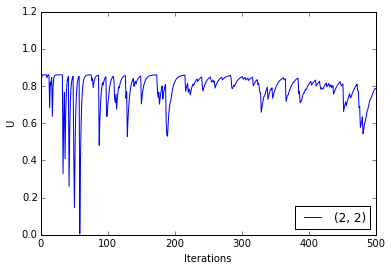

In [12]:
agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))
graph_utility_estimates(agent, sequential_decision_environment, 500, [(2,2)])

It is also possible to plot multiple states on the same plot.

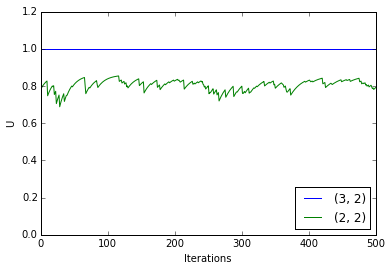

In [13]:
graph_utility_estimates(agent, sequential_decision_environment, 500, [(2,2), (3,2)])